# Numerical Integration

There are a number of numerical integration schemes, each with its own degrees of accuracy and computational cost. Typically, the more accurate the method, the costlier it is in terms of the number computations. 

We will be examining the following methods:
1. Euler's method
2. Trapezoid
3. Runge-Kutta

## Euler's method

A function, or a set of discrete pairs of values of dependent and independent variables, can be 'chopped' up into rectangles of width $\Delta x$ and height $f(x)$, where $x$ is the independent variable. The sum of the areas of the rectangles within some given range is then the approximate area under the curve. This is called the **Riemann Sum**.

Consider the function 
$f(x) = \sin(x)+x^{1/2}$

in the range of $x=[0,3\pi]$

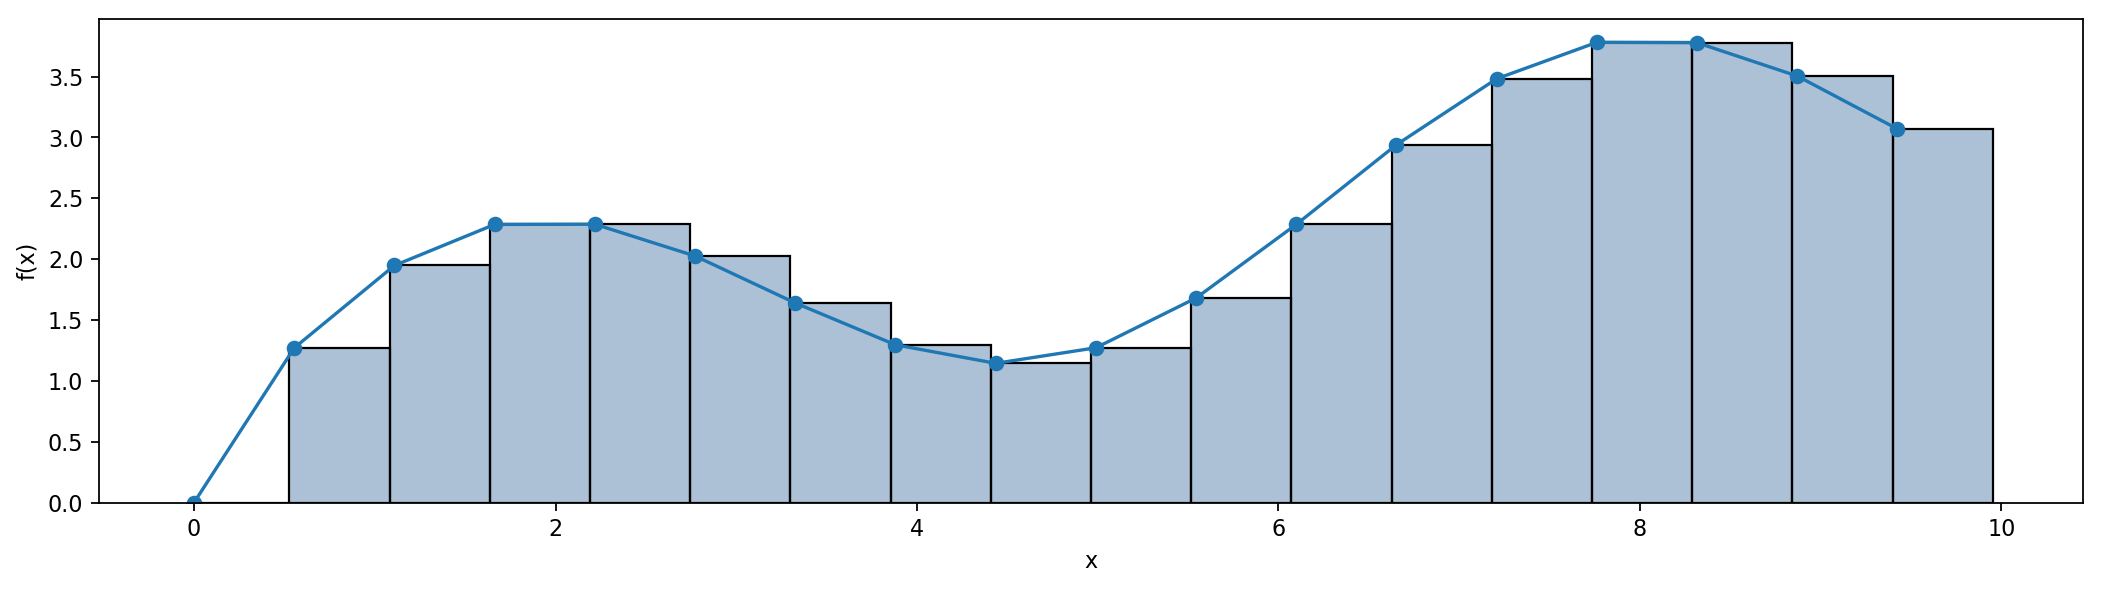

Riemann Sum = 19.847734937610095
actual integral = 21.289254007441496
error = 0.06771111234463775


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# define the function f(x)
def f(x):
    return np.sin(x)+x**(1/2)

# PLOT THE FUNCTION
# in order to plot the function, you'd need to create a discrete set of x and corresponding f(x) values. 
# Python can only plot a discrete set of pairs (or triplets for 3D plots) of values against each other.

# make a list of x values in the range [0,3pi] in intervals of some dx
dx = 0.5
xmin = 0
xmax = 3*np.pi

N = int((xmax-xmin)/dx)
x_list = np.linspace(xmin, xmax, N)
fx_list = f(x_list)

# plot the function
plt.figure(figsize=(16, 4), dpi=80)
plt.plot(x_list,fx_list,'o-')
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.fill_between(x_list, fx_list, 0, alpha=0.2)
# plt.fill_between(x_list, fx_list)
bar_width = np.diff(x_list)[0]
plt.bar(x_list+dx/2, fx_list, bar_width, color=(0.2, 0.4, 0.6, 0.4),edgecolor='black')
plt.show()

# Euler's scheme
area = 0
for xi in x_list:
    area = area + f(xi)*dx
    
print ('Riemann Sum =',area)

# compute error from analytically derived integral
def intf(xmin, xmax):
    return 2*xmax**(3/2)/3-np.cos(xmax) - (2*xmin**(3/2)/3-np.cos(xmin))

area_actual = intf(xmin, xmax)
print ('actual integral =', area_actual)

# error
err = abs(area_actual-area)/area_actual
print ('error =', err)

As you can see, the errors are due to the missing (or extra) areas under the curve due to using rectangles of finite width. We know from calculus that the sum of areas of all rectangles will be equal to the area under the curve in the limit of $\Delta x\rightarrow0$, i.e.,

$$ \lim_{\Delta x\rightarrow 0}\sum_{i=1}^N f(x_i)\cdot dx = \mathrm{Area\, under\, curve}$$

where $N$ is the number of rectangles

### Assignment

1. Modify the above code and run it over a range of values of $dx$, starting from one-tenth of the given value to twice the given value, with some arbitrarily chosen number of intervals. Find the computation time for the Riemann Sum for each value of $dx$ and make a plot of the time agaist $dx$.
2. Also compute the error for each value of $dx$, and then plot them against each other.

In [23]:
#Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import timeit

# define the function f(x)
def f(x):
    return np.sin(x)+x**(1/2)

#define the funtion intf
def intf(xmin, xmax):
    return 2*xmax**(3/2)/3-np.cos(xmax) - (2*xmin**(3/2)/3-np.cos(xmin))

# make a list of x values in the range [0,3pi]
xmin = 0
xmax = 3*np.pi

#calculate analyitical solution for the intregal
area_actual = intf(xmin, xmax)
print ('actual integral =', area_actual)

#Create empty arrays for the calculated error and computational time
dx_err = []
dx_comptime = []

# NUMERICAL INTEGRATION USING EULER'S METHOD
for N in range(10,1000):

    start = timeit.default_timer() #begins timer
    dx = (xmax - xmin)/N
    x_list = np.linspace(xmin, xmax, N)
    fx_list = f(x_list)

    # Euler's scheme
    area = 0
    for xi in x_list:
        area = area + f(xi)*dx
    
    stop = timeit.default_timer() #ends timer
    comptime = stop-start
    
    # calculates error
    err = abs(area_actual-area)/area_actual

    # Add all our received values to the empty arrays we created initially
    dx_err.append([dx, err])
    dx_comptime.append([dx, comptime])


actual integral = 21.289254007441496


Text(0,0.5,'err')

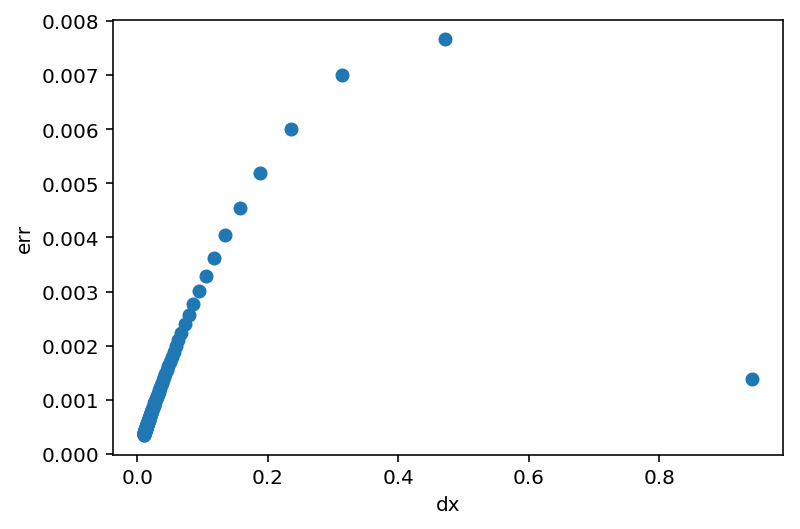

In [54]:
# Turn the array that contains error into a numpy array so we can use it
dx_err = np.asarray(dx_err)

# Plot dx vs error
plt.plot(dx_err[:,0],dx_err[:,1],'o')
plt.xlabel('dx')
plt.ylabel('err')

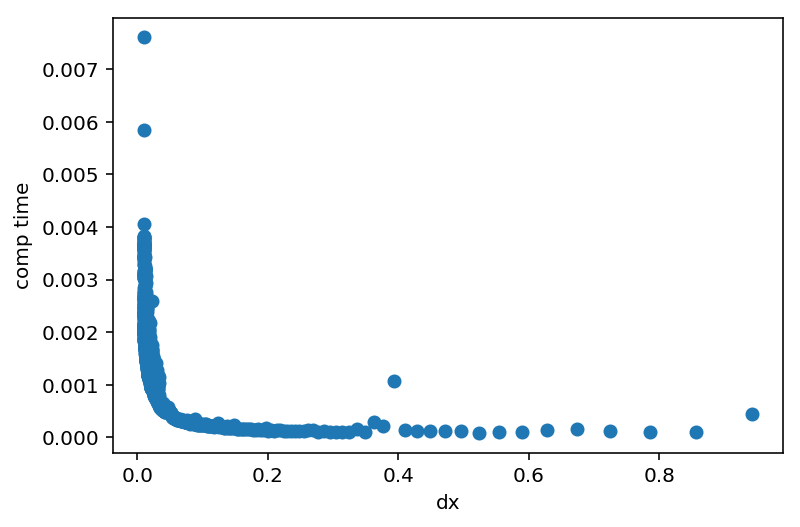

In [25]:
# Turn the array that contains error into a numpy array so we can use it
dx_comptime = np.asarray(dx_comptime)

# Plot dx vs comp time
plt.xlabel('dx')
plt.ylabel('comp time')
plt.plot(dx_comptime[:,0],dx_comptime[:,1],'o')

### Trapezoid Method

In this method. instead of summing over the areas of rectangles, we use trapezoids (which are triangles sitting on top of rectangles). This gives more accurate summations for the same $dx$ value.

In [47]:
#Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import timeit

# define the function f(x)
def f(x):
    return np.sin(x)+x**(1/2)

#define the funtion intf
def intf(xmin, xmax):
    return 2*xmax**(3/2)/3-np.cos(xmax) - (2*xmin**(3/2)/3-np.cos(xmin))

# make a list of x values in the range [0,3pi]
xmin = 0
xmax = 3*np.pi

#calculate analyitical solution for the intregal
area_actual = intf(xmin, xmax)
print ('actual integral =', area_actual)

#Create empty arrays for the calculated error and computational time
dx_err = []
dx_comptime = []
N_err = []

# NUMERICAL INTEGRATION USING EULER'S METHOD
for N in range(10,1000,10):

    start = timeit.default_timer() #begins timer
    dx = (xmax - xmin)/N
    x_list = np.linspace(xmin, xmax, N)
    fx_list = f(x_list)

    # Trapezoid method scheme
    area = 0
    for xi in x_list: # should be fixed now
        area = area + f(xi)*dx + (1/2)*(f(xi+dx)-f(xi))*dx
    
    stop = timeit.default_timer() #ends timer
    comptime = stop-start
    
    # calculates error
    err = abs(area_actual-area)/area_actual

    # Add all our received values to the empty arrays we created initially
    dx_err.append([dx, err])
    dx_comptime.append([dx, comptime])
    N_err.append([N, err])
    
print ('done')


actual integral = 21.289254007441496


done


Text(0,0.5,'err')

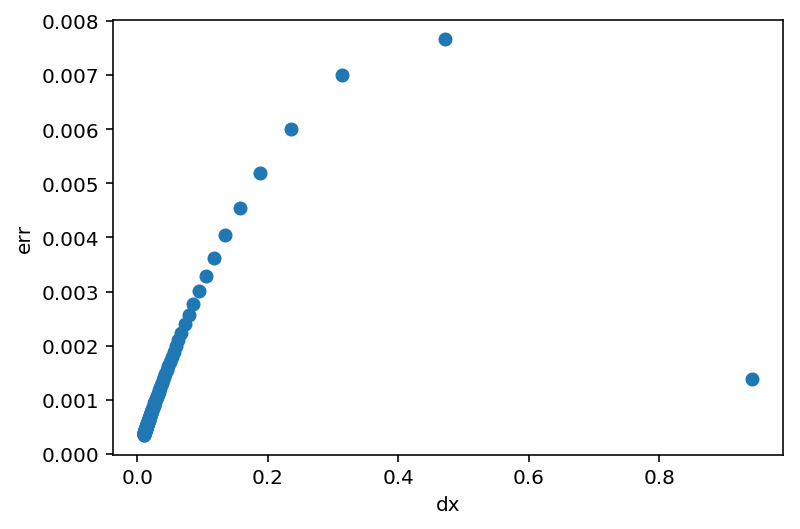

In [52]:
# Turn the array that contains error into a numpy array so we can use it
dx_err = np.asarray(dx_err)
N_err = np.asarray(N_err)
# Plot dx vs error
plt.plot(dx_err[:,0],dx_err[:,1],'o')
# plt.plot(N_err[:,0], N_err[:,1],'o')
plt.xlabel('dx')
plt.ylabel('err')

In [50]:
N_err

[[10, 0.0013748511834752784],
 [20, 0.007658450657021212],
 [30, 0.006996186554622663],
 [40, 0.006009703440038052],
 [50, 0.005190850410542588],
 [60, 0.0045459540753231015],
 [70, 0.004035219212906224],
 [80, 0.003624056517416323],
 [90, 0.0032872399682603946],
 [100, 0.0030068578941718407],
 [110, 0.002770106078234793],
 [120, 0.0025676831358857166],
 [130, 0.0023927081747828986],
 [140, 0.0022399990827482487],
 [150, 0.002105587304929389],
 [160, 0.001986386675492137],
 [170, 0.0018799634938579158],
 [180, 0.001784374115941076],
 [190, 0.0016980483160599995],
 [200, 0.0016197042018199156],
 [210, 0.0015482852366443672],
 [220, 0.0014829129927351377],
 [230, 0.0014228512601872575],
 [240, 0.0013674784660367943],
 [250, 0.0013162662513989802],
 [260, 0.0012687626659764564],
 [270, 0.0012245788628313548],
 [280, 0.001183378473761931],
 [290, 0.0011448690572507907],
 [300, 0.00110879516316825],
 [310, 0.0010749326692342316],
 [320, 0.0010430841257008693],
 [330, 0.001013074905231397],


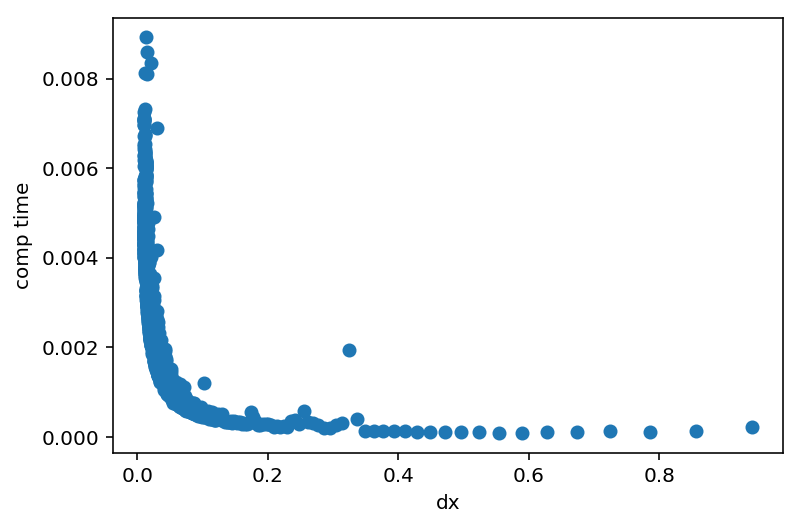

In [28]:
# Turn the array that contains error into a numpy array so we can use it
dx_comptime = np.asarray(dx_comptime)

# Plot dx vs comp time
plt.xlabel('dx')
plt.ylabel('comp time')
plt.plot(dx_comptime[:,0],dx_comptime[:,1],'o')

### Assignment

